In [37]:
# Shoutout to the YT channel @samson for the inspiration 

# Today i'll be implementing ANN in python from scratch without using tensorflow.

In [38]:
# Lets's begin 
# Maths behind the ANN 
# We make input np arrays as we can't perform "Maths" on df duhhhh and pandas not allowed :)
# We also convert the data to be fed to any different layers 
# 1). This layer will be the input layer there will be 784 (28*28) values as input
# random weights and biases(-0.5, 0.5) will be appointed to the hidden layer 1 output
# 2). This is the hidden layer 1 where we are using activation function ReLU and we propogate to the nes=ext layer
# again during propagation we add some weights and biases moving ahead
# 3). This is the hidden layer 2 where we get result from hidden layer 1 and we have decided to apply softmax on this layer
# We get the answer from the maximum of all the softmax values.
# This is not it though the beauty of neural networks lie in thier upadation tendencies that is where the "Learning" part comes in
# Here we will propagate back to update the weights in the earlier layers as per the deviation of the predicted value with the real value.
# and we will this till we achieve a grasp of the data
# Similar logic to regression thing.
# ANN is just a glorified and multidimensional regression without the activation functions(What i think)
# At last we can apply some analysing measures to see our results 

In [39]:
import pandas as pd
import numpy as np
# Loading the MNIST digit recognition dataset for this model
data = pd.read_csv("./MNIST.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Ok no cheating 
data = np.array(data)
m, n = data.shape

np.random.shuffle(data) # shuffling before splitting into test and training sets



In [41]:
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.



In [42]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [43]:
Y_train

array([6, 9, 7, ..., 5, 4, 9], dtype=int64)

In [44]:
# Now we start the maths part
# Before anything we should define the activation functions and their derivativefor our ease 

def ReLU(z):
    return np.maximum(z,0)

def softmax(z):
    A = np.exp(z)/sum(np.exp(z))
    return A

def ReLU_deriv(Z):
    return Z > 0

In [45]:
# This is the function for getting y in the proper format when we have to compare it with the output of our fwd prop function
def modified_Y(Y):
    modf_Y = np.zeros((Y.size, Y.max() + 1))
    modf_Y[np.arange(Y.size), Y] = 1
    modf_Y = modf_Y.T
    return modf_Y

In [46]:
# initialising random variables for weights in layers
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) -0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10,1) -0.5
    return W1, b1, W2, b2
# Now we forward propogate with the weightds and biaes in our hand
def fwd_prop(W1, W2, b1, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
# Now we back propogate
def back_prop(W1, W2, A1, A2, Z1, Z2, X, Y):
    modf_Y = modified_Y(Y)
    dZ2 = A2 - modf_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
# Upgrading the weights from what we leared
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [47]:
# Analysising our model through accuracy and visualisisng

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Runs the process of fwd and bckwd prop miultiple times to refine our model 

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = fwd_prop(W1, W2, b1, b2, X)
        dW1, db1, dW2, db2 = back_prop(W1, W2, A1, A2, Z1, Z2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [48]:
# Testing with learning rate of 0.10
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 4 4 ... 2 6 2] [6 9 7 ... 5 4 9]
0.12797560975609756
Iteration:  50
[0 4 9 ... 3 4 9] [6 9 7 ... 5 4 9]
0.4961219512195122
Iteration:  100
[0 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.6340975609756098
Iteration:  150
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.702780487804878
Iteration:  200
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.7438292682926829
Iteration:  250
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.7706585365853659
Iteration:  300
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.7893414634146342
Iteration:  350
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.8033658536585366
Iteration:  400
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.8156097560975609
Iteration:  450
[6 9 7 ... 3 4 9] [6 9 7 ... 5 4 9]
0.8246829268292682


In [55]:
from matplotlib import pyplot as plt
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fwd_prop(W1, W2, b1, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [56]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[5 3 7 9 7 7 4 3 8 9 0 8 4 6 2 1 2 8 8 1 2 0 8 7 7 6 6 3 0 8 5 6 2 1 9 3 5
 2 9 7 4 2 5 3 5 0 2 3 6 7 9 4 3 4 1 1 1 8 8 1 4 4 2 1 8 0 4 9 3 4 4 3 6 6
 0 3 6 8 2 9 7 6 1 5 4 1 7 5 6 3 8 1 8 6 5 8 3 9 1 4 8 3 5 1 0 9 0 0 7 5 6
 9 5 7 2 1 9 7 3 1 2 6 9 2 9 5 6 4 2 7 9 2 3 1 2 2 8 3 9 8 8 1 0 7 3 5 3 9
 7 2 8 2 5 6 3 9 1 7 8 8 0 5 0 9 0 6 0 7 3 8 9 6 3 6 7 6 0 1 5 3 5 3 2 6 3
 7 6 3 6 1 1 6 8 1 2 0 0 3 6 5 3 2 7 1 6 6 6 1 5 5 9 4 0 1 0 0 8 3 6 3 5 0
 3 8 7 0 7 6 0 9 9 9 4 2 5 7 2 6 3 8 1 7 1 4 1 3 6 1 8 9 1 7 4 7 8 2 2 9 2
 7 7 8 5 5 2 4 1 7 0 2 1 0 4 2 9 2 8 1 1 9 0 1 4 5 3 8 1 4 4 8 0 9 2 3 0 0
 1 7 3 7 6 8 2 8 0 9 1 0 6 3 2 4 8 2 8 7 9 1 5 7 2 6 8 1 0 3 2 1 1 2 7 7 9
 6 4 1 9 4 0 4 9 6 7 4 0 0 7 6 9 5 1 9 8 5 4 2 8 6 0 4 9 7 9 5 1 0 1 0 3 1
 6 8 9 8 6 2 7 5 7 3 5 5 3 0 2 7 5 9 1 6 0 3 9 1 6 4 8 5 5 7 1 6 2 7 3 6 9
 2 7 3 6 1 2 6 1 5 7 9 3 2 8 9 6 2 2 8 5 0 6 6 4 9 4 6 0 8 6 1 1 5 6 0 1 6
 9 1 1 9 7 0 8 7 8 1 6 4 1 1 5 4 4 6 9 9 0 4 6 0 8 0 0 5 8 3 4 4 5 4 6 3 8
 1 6 5 9 4 2 9 8 9 4 5 1 

0.824

Prediction:  [9]
Label:  9


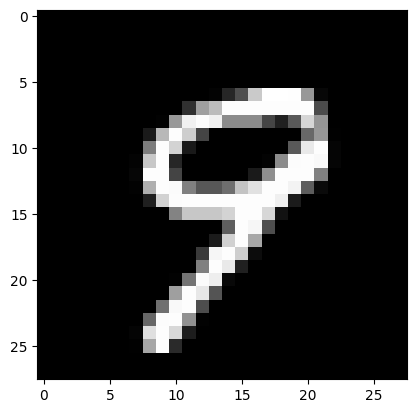

In [57]:
test_prediction(1, W1, b1, W2, b2)